# Import the necessary library

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Read the data set

In [2]:
df=pd.read_csv("Test_data.csv")

# Check first five rows to get overview of dataset

In [3]:
df.head()

employee_id         department     region   education gender  \
0         8724         Technology  region_26  Bachelor's      m   
1        74430                 HR   region_4  Bachelor's      f   
2        72255  Sales & Marketing  region_13  Bachelor's      m   
3        38562        Procurement   region_2  Bachelor's      f   
4        64486            Finance  region_29  Bachelor's      m   

  recruitment_channel  no_of_trainings  age  previous_year_rating  \
0            sourcing                1   24                   NaN   
1               other                1   31                   3.0   
2               other                1   31                   1.0   
3               other                3   31                   2.0   
4            sourcing                1   30                   4.0   

   length_of_service  KPIs_met >80%  awards_won?  avg_training_score  
0                  1              1            0                  77  
1                  5              0            0                  51  
2                  4              0            0                  47  
3                  9              0            0                  65  
4                  7              0            0                  61

In [4]:
#check the dimension of data
df.shape

(23490, 13)

In [5]:
#check basic info avialable
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23490 entries, 0 to 23489
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   employee_id           23490 non-null  int64  
 1   department            23490 non-null  object 
 2   region                23490 non-null  object 
 3   education             22456 non-null  object 
 4   gender                23490 non-null  object 
 5   recruitment_channel   23490 non-null  object 
 6   no_of_trainings       23490 non-null  int64  
 7   age                   23490 non-null  int64  
 8   previous_year_rating  21678 non-null  float64
 9   length_of_service     23490 non-null  int64  
 10  KPIs_met >80%         23490 non-null  int64  
 11  awards_won?           23490 non-null  int64  
 12  avg_training_score    23490 non-null  int64  
dtypes: float64(1), int64(7), object(5)
memory usage: 2.3+ MB


In [6]:
#check statistical summary
df.describe()

employee_id  no_of_trainings           age  previous_year_rating  \
count  23490.000000     23490.000000  23490.000000          21678.000000   
mean   39041.399149         1.254236     34.782929              3.339146   
std    22640.809201         0.600910      7.679492              1.263294   
min        3.000000         1.000000     20.000000              1.000000   
25%    19370.250000         1.000000     29.000000              3.000000   
50%    38963.500000         1.000000     33.000000              3.000000   
75%    58690.000000         1.000000     39.000000              4.000000   
max    78295.000000         9.000000     60.000000              5.000000   

       length_of_service  KPIs_met >80%   awards_won?  avg_training_score  
count       23490.000000   23490.000000  23490.000000        23490.000000  
mean            5.810387       0.358834      0.022776           63.263133  
std             4.207917       0.479668      0.149191           13.411750  
min             1.000000       0.000000      0.000000           39.000000  
25%             3.000000       0.000000      0.000000           51.000000  
50%             5.000000       0.000000      0.000000           60.000000  
75%             7.000000       1.000000      0.000000           76.000000  
max            34.000000       1.000000      1.000000           99.000000

In [7]:
#Check for null values
df.isnull().sum()

employee_id                0
department                 0
region                     0
education               1034
gender                     0
recruitment_channel        0
no_of_trainings            0
age                        0
previous_year_rating    1812
length_of_service          0
KPIs_met >80%              0
awards_won?                0
avg_training_score         0
dtype: int64

In [8]:
#calculate percentage of null values
(df.isnull().sum()/len(df))*100

employee_id             0.000000
department              0.000000
region                  0.000000
education               4.401873
gender                  0.000000
recruitment_channel     0.000000
no_of_trainings         0.000000
age                     0.000000
previous_year_rating    7.713921
length_of_service       0.000000
KPIs_met >80%           0.000000
awards_won?             0.000000
avg_training_score      0.000000
dtype: float64

In [9]:
z=df["previous_year_rating"].mean()

In [10]:
z

3.339145677645539

### fill null value in 'previous_year_rating' with average of the column

In [11]:
df["previous_year_rating"].fillna(z,inplace=True)

In [12]:
df["previous_year_rating"].isnull().sum()

0

In [13]:
#Again Check information 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23490 entries, 0 to 23489
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   employee_id           23490 non-null  int64  
 1   department            23490 non-null  object 
 2   region                23490 non-null  object 
 3   education             22456 non-null  object 
 4   gender                23490 non-null  object 
 5   recruitment_channel   23490 non-null  object 
 6   no_of_trainings       23490 non-null  int64  
 7   age                   23490 non-null  int64  
 8   previous_year_rating  23490 non-null  float64
 9   length_of_service     23490 non-null  int64  
 10  KPIs_met >80%         23490 non-null  int64  
 11  awards_won?           23490 non-null  int64  
 12  avg_training_score    23490 non-null  int64  
dtypes: float64(1), int64(7), object(5)
memory usage: 2.3+ MB


In [14]:
#now one key note is that 'education' also have full values that also needed to fill before preceding further.

In [15]:
df["education"].isna().sum()

1034

In [16]:
#fill null values with unknown
df["education"]=df["education"].fillna("unknown")

In [17]:
#again check that any null value is present
df["education"].isna().sum()

0

In [18]:
#count values by group
df["education"].value_counts()

education
Bachelor's          15578
Master's & above     6504
unknown              1034
Below Secondary       374
Name: count, dtype: int64

# DATA VISUALIZATION 

### COUNT OF "EDUCATION LEVEL(WITH UNKOWNS)"

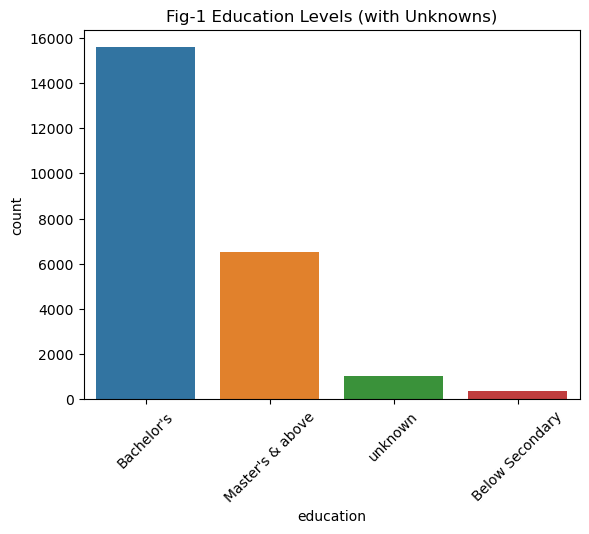

In [19]:
sns.countplot(data=df, x='education')
plt.xticks(rotation=45)
plt.title("Fig-1 Education Levels (with Unknowns)")
plt.show()

### Count of Employee per department

Text(0.5, 1.0, 'Fig-2 Employee Count by Department')

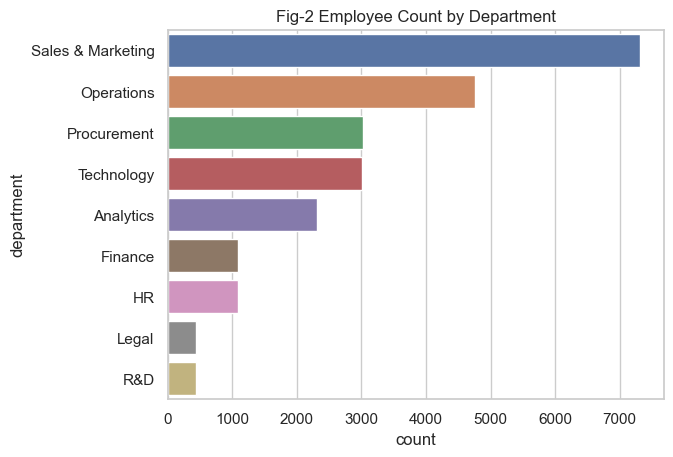

In [20]:
sns.set(style="whitegrid")
sns.countplot(data=df, y="department", order=df["department"].value_counts().index)
plt.title("Fig-2 Employee Count by Department")

### Average training score by department

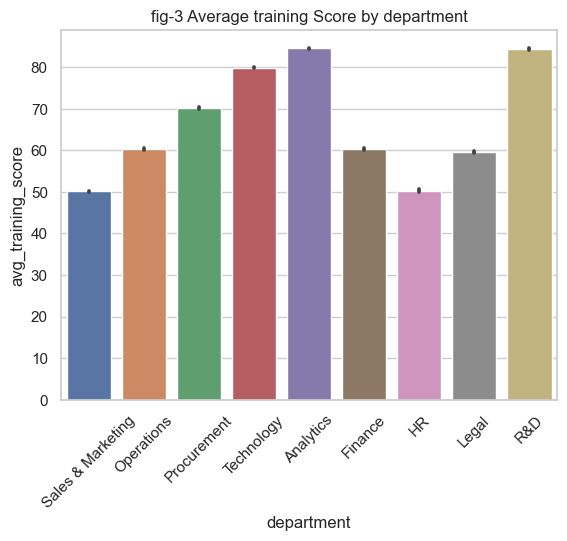

In [21]:
sns.barplot(
    data=df,
    x="department",
    y="avg_training_score",
    estimator=np.mean,
    order=df["department"].value_counts().index)
plt.xticks(rotation=45)
plt.title("fig-3 Average training Score by department")
plt.show()

### Number of employees by recruitment channel

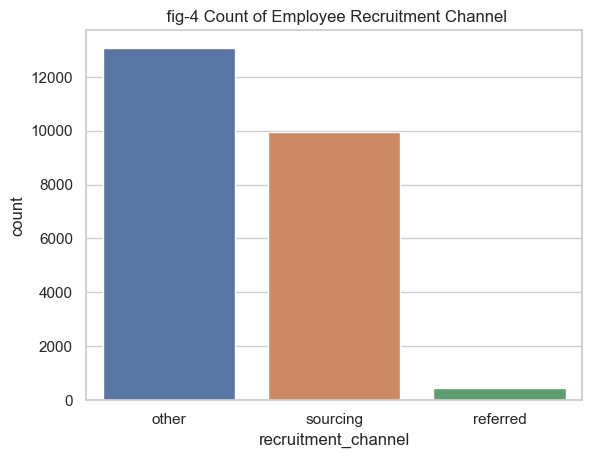

In [22]:
sns.countplot(
    data=df,
    x="recruitment_channel",
    order=df["recruitment_channel"].value_counts().index)
plt.title(" fig-4 Count of Employee Recruitment Channel")
plt.show()

### Average previous year rating

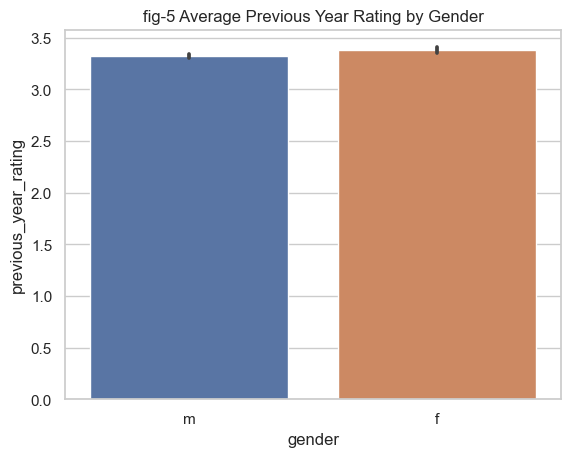

In [23]:
sns.barplot(
    data=df,
    x="gender",
    y="previous_year_rating",
    estimator=np.mean)
plt.title("fig-5 Average Previous Year Rating by Gender")
plt.show()

### Distribution of employees by number of trainings

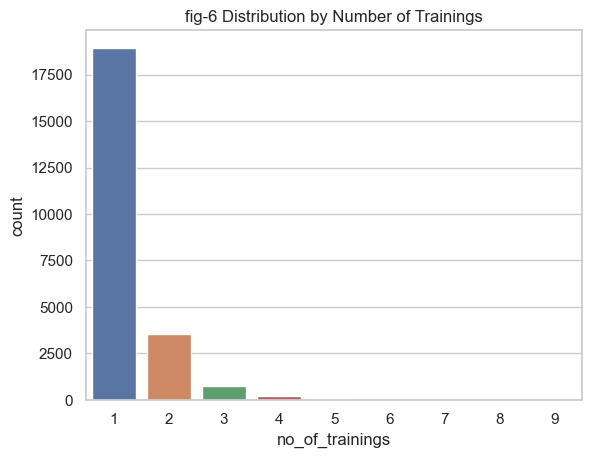

In [24]:
sns.countplot(
    data=df,
    x="no_of_trainings",
    order=sorted(df["no_of_trainings"].unique())
)
plt.title("fig-6 Distribution by Number of Trainings")
plt.show()

### Checking Correlation between the features

In [27]:
corr_matrix = df.corr(numeric_only=True)

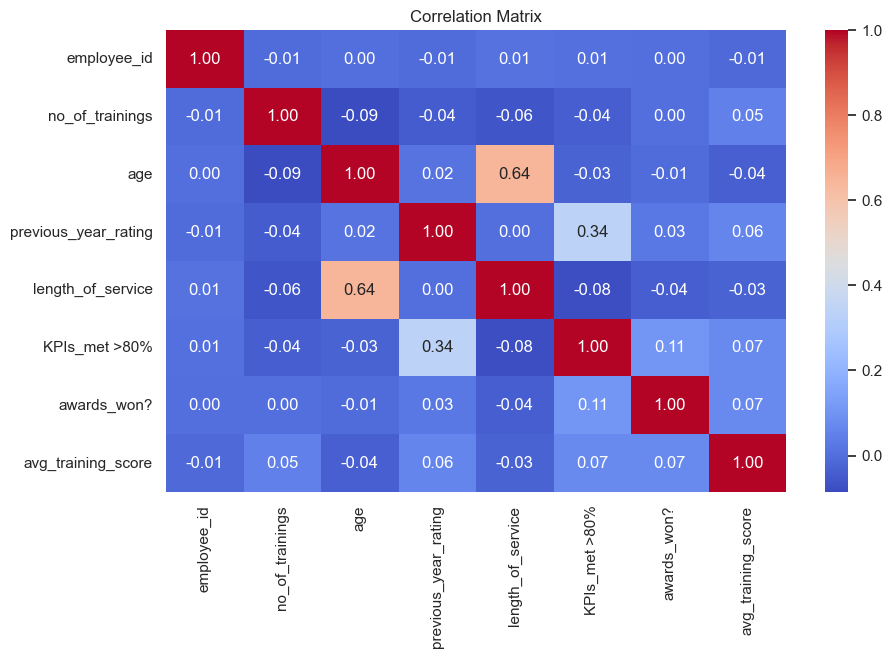

In [28]:
#using correlation matrix
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

In [29]:
df.shape

(23490, 13)

In [36]:
#Drop less important columns
df_clean = df.drop(columns=["employee_id","region","recruitment_channel"],inplace=True)

In [37]:
#check first five rows again
df.head()

department   education gender  no_of_trainings  age  \
0         Technology  Bachelor's      m                1   24   
1                 HR  Bachelor's      f                1   31   
2  Sales & Marketing  Bachelor's      m                1   31   
3        Procurement  Bachelor's      f                3   31   
4            Finance  Bachelor's      m                1   30   

   previous_year_rating  length_of_service  KPIs_met >80%  awards_won?  \
0              3.339146                  1              1            0   
1              3.000000                  5              0            0   
2              1.000000                  4              0            0   
3              2.000000                  9              0            0   
4              4.000000                  7              0            0   

   avg_training_score  
0                  77  
1                  51  
2                  47  
3                  65  
4                  61

In [38]:
#checking the shape after dropping
df.shape

(23490, 10)

In [41]:
# Define the target variable
target_column = 'KPIs_met >80%'
y = df[target_column]          # target variable
X = df.drop(columns=[target_column],inplace=True)  # features

In [42]:
#checking shape
df.shape

(23490, 9)

In [43]:
df.head()

department   education gender  no_of_trainings  age  \
0         Technology  Bachelor's      m                1   24   
1                 HR  Bachelor's      f                1   31   
2  Sales & Marketing  Bachelor's      m                1   31   
3        Procurement  Bachelor's      f                3   31   
4            Finance  Bachelor's      m                1   30   

   previous_year_rating  length_of_service  awards_won?  avg_training_score  
0              3.339146                  1            0                  77  
1              3.000000                  5            0                  51  
2              1.000000                  4            0                  47  
3              2.000000                  9            0                  65  
4              4.000000                  7            0                  61

In [44]:
# Suppose your dataframe is `df` and your categorical columns are:
categorical_cols = ['department', 'education', 'gender']

# Apply one-hot encoding using pandas
df_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

# Preview
print(df_encoded.head())

   no_of_trainings  age  previous_year_rating  length_of_service  awards_won?  \
0                1   24              3.339146                  1            0   
1                1   31              3.000000                  5            0   
2                1   31              1.000000                  4            0   
3                3   31              2.000000                  9            0   
4                1   30              4.000000                  7            0   

   avg_training_score  department_Finance  department_HR  department_Legal  \
0                  77               False          False             False   
1                  51               False           True             False   
2                  47               False          False             False   
3                  65               False          False             False   
4                  61                True          False             False   

   department_Operations  department_Procure

In [50]:
#changing dataytpe into required binary 0 and 1
df_encoded = df_encoded.astype(int)

In [51]:
df_encoded.head()

no_of_trainings  age  previous_year_rating  length_of_service  awards_won?  \
0                1   24                     3                  1            0   
1                1   31                     3                  5            0   
2                1   31                     1                  4            0   
3                3   31                     2                  9            0   
4                1   30                     4                  7            0   

   avg_training_score  department_Finance  department_HR  department_Legal  \
0                  77                   0              0                 0   
1                  51                   0              1                 0   
2                  47                   0              0                 0   
3                  65                   0              0                 0   
4                  61                   1              0                 0   

   department_Operations  department_Procurement  department_R&D  \
0                      0                       0               0   
1                      0                       0               0   
2                      0                       0               0   
3                      0                       1               0   
4                      0                       0               0   

   department_Sales & Marketing  department_Technology  \
0                             0                      1   
1                             0                      0   
2                             1                      0   
3                             0                      0   
4                             0                      0   

   education_Below Secondary  education_Master's & above  education_unknown  \
0                          0                           0                  0   
1                          0                           0                  0   
2                          0                           0                  0   
3                          0                           0                  0   
4                          0                           0                  0   

   gender_m  
0         1  
1         0  
2         1  
3         0  
4         1

### Importing necessary libraries for data scaling

In [52]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, MaxAbsScaler, RobustScaler

# Your numerical features only
numerical_cols = ['no_of_trainings', 'age', 'previous_year_rating',
                  'length_of_service', 'avg_training_score', 'awards_won?']

X_num = df[numerical_cols]

# Choose your scaler:
# scaler = StandardScaler()
# scaler = MinMaxScaler()
# scaler = MaxAbsScaler()
scaler = RobustScaler()

# Fit and transform
X_scaled = scaler.fit_transform(X_num)

# Convert back to DataFrame if needed
X_scaled_df = pd.DataFrame(X_scaled, columns=numerical_cols)

# Preview
print(X_scaled_df.head())


   no_of_trainings  age  previous_year_rating  length_of_service  \
0              0.0 -0.9              0.339146              -1.00   
1              0.0 -0.2              0.000000               0.00   
2              0.0 -0.2             -2.000000              -0.25   
3              2.0 -0.2             -1.000000               1.00   
4              0.0 -0.3              1.000000               0.50   

   avg_training_score  awards_won?  
0                0.68          0.0  
1               -0.36          0.0  
2               -0.52          0.0  
3                0.20          0.0  
4                0.04          0.0  


In [53]:
X_scaled_df.head()

no_of_trainings  age  previous_year_rating  length_of_service  \
0              0.0 -0.9              0.339146              -1.00   
1              0.0 -0.2              0.000000               0.00   
2              0.0 -0.2             -2.000000              -0.25   
3              2.0 -0.2             -1.000000               1.00   
4              0.0 -0.3              1.000000               0.50   

   avg_training_score  awards_won?  
0                0.68          0.0  
1               -0.36          0.0  
2               -0.52          0.0  
3                0.20          0.0  
4                0.04          0.0

In [54]:
# Combine scaled numerical and encoded categorical
X_processed = pd.concat([X_scaled_df,df_encoded], axis=1)

In [57]:
X_processed.head()

no_of_trainings  age  previous_year_rating  length_of_service  \
0              0.0 -0.9              0.339146              -1.00   
1              0.0 -0.2              0.000000               0.00   
2              0.0 -0.2             -2.000000              -0.25   
3              2.0 -0.2             -1.000000               1.00   
4              0.0 -0.3              1.000000               0.50   

   avg_training_score  awards_won?  no_of_trainings  age  \
0                0.68          0.0                1   24   
1               -0.36          0.0                1   31   
2               -0.52          0.0                1   31   
3                0.20          0.0                3   31   
4                0.04          0.0                1   30   

   previous_year_rating  length_of_service  ...  department_Legal  \
0                     3                  1  ...                 0   
1                     3                  5  ...                 0   
2                     1                  4  ...                 0   
3                     2                  9  ...                 0   
4                     4                  7  ...                 0   

   department_Operations  department_Procurement  department_R&D  \
0                      0                       0               0   
1                      0                       0               0   
2                      0                       0               0   
3                      0                       1               0   
4                      0                       0               0   

   department_Sales & Marketing  department_Technology  \
0                             0                      1   
1                             0                      0   
2                             1                      0   
3                             0                      0   
4                             0                      0   

   education_Below Secondary  education_Master's & above  education_unknown  \
0                          0                           0                  0   
1                          0                           0                  0   
2                          0                           0                  0   
3                          0                           0                  0   
4                          0                           0                  0   

   gender_m  
0         1  
1         0  
2         1  
3         0  
4         1  

[5 rows x 24 columns]

# Split the dataset from training/testing 

In [63]:
from sklearn.model_selection import train_test_split
# Split into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(
    X_processed, y,
    test_size=0.2,
    random_state=42,
    stratify=y  # Optional but recommended for balanced class splits
)

# Quick sanity check
print("Training set shape:", X_train.shape)
print("Test set shape:", X_test.shape)


Training set shape: (18792, 24)
Test set shape: (4698, 24)


### Import libraries for model training

In [64]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Step 1: Initialize the model
model = LogisticRegression(max_iter=1000)

# Step 2: Train the model
model.fit(X_train, y_train)

# Step 3: Make predictions
y_pred = model.predict(X_test)

# Step 4: Evaluate the model
print("✅ Model Evaluation Results:")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


✅ Model Evaluation Results:
Accuracy: 0.6862494678586633

Confusion Matrix:
 [[2538  474]
 [1000  686]]

Classification Report:
               precision    recall  f1-score   support

           0       0.72      0.84      0.77      3012
           1       0.59      0.41      0.48      1686

    accuracy                           0.69      4698
   macro avg       0.65      0.62      0.63      4698
weighted avg       0.67      0.69      0.67      4698



### Check for other model like XGBoost

C:\Users\shobhit\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [18:38:09] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


✅ Model Accuracy: 0.6919965942954449
✅ Classification Report:
               precision    recall  f1-score   support

           0       0.72      0.84      0.78      3012
           1       0.60      0.42      0.50      1686

    accuracy                           0.69      4698
   macro avg       0.66      0.63      0.64      4698
weighted avg       0.68      0.69      0.68      4698



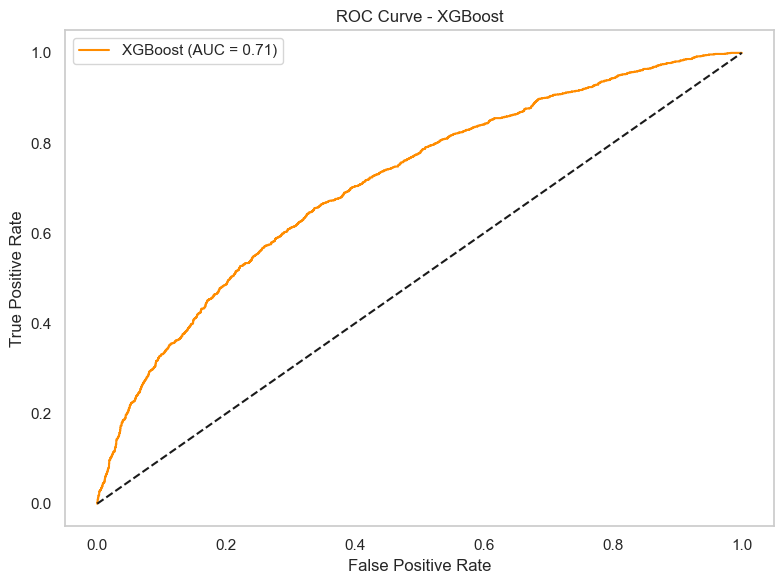

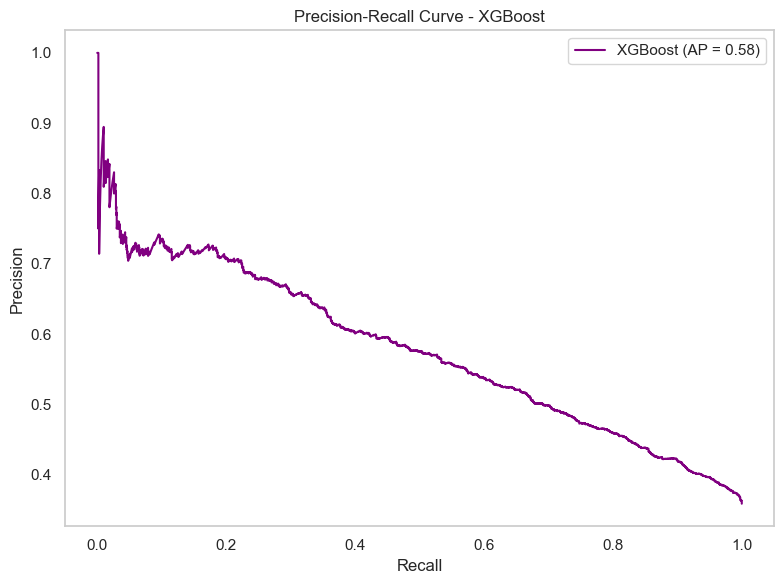

In [91]:
# 1. Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler
from sklearn.metrics import (
    accuracy_score, classification_report, roc_curve,
    roc_auc_score, precision_recall_curve, average_precision_score
)
from xgboost import XGBClassifier

# 2. Load dataset
df = pd.read_csv("Test_data.csv")

# 3. Drop irrelevant columns
df.drop(columns=['employee_id', 'region', 'recruitment_channel'], inplace=True)

# 4. Define target variable
df['KPIs_met >80%'] = df['KPIs_met >80%'].astype(int)
y = df['KPIs_met >80%']
X = df.drop(columns=['KPIs_met >80%'])

# 5. One-hot encode categorical features
categorical_cols = ['department', 'education', 'gender']
X_cat = pd.get_dummies(X[categorical_cols], drop_first=True)

# 6. Scale numeric features
numerical_cols = ['no_of_trainings', 'age', 'previous_year_rating',
                  'length_of_service', 'avg_training_score', 'awards_won?']
scaler = RobustScaler()
X_num = pd.DataFrame(scaler.fit_transform(X[numerical_cols]),
                     columns=numerical_cols, index=X.index)

# 7. Combine numeric and categorical features
X_processed = pd.concat([X_num, X_cat], axis=1)

# 8. Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X_processed, y, test_size=0.2, random_state=42, stratify=y)

# Ensure y is 1D
y_train = np.ravel(y_train)
y_test = np.ravel(y_test)

# 9. Define and train XGBoost model
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb_model.fit(X_train, y_train)

# 10. Predictions and evaluation
y_pred = xgb_model.predict(X_test)
y_proba = xgb_model.predict_proba(X_test)[:, 1]

print("✅ Model Accuracy:", accuracy_score(y_test, y_pred))
print("✅ Classification Report:\n", classification_report(y_test, y_pred))

# 11. ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_proba)
auc_score = roc_auc_score(y_test, y_proba)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"XGBoost (AUC = {auc_score:.2f})", color='darkorange')
plt.plot([0, 1], [0, 1], "k--")
plt.title("ROC Curve - XGBoost")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.grid()
plt.tight_layout()
plt.savefig("xgboost_roc_curve.png")
plt.show()

# 12. Precision-Recall Curve
precision, recall, _ = precision_recall_curve(y_test, y_proba)
avg_precision = average_precision_score(y_test, y_proba)

plt.figure(figsize=(8, 6))
plt.plot(recall, precision, label=f"XGBoost (AP = {avg_precision:.2f})", color='purple')
plt.title("Precision-Recall Curve - XGBoost")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()


### Checking for LightGbm 

In [92]:
from lightgbm import LGBMClassifier
from sklearn.metrics import accuracy_score, classification_report

# Make sure y is 1D
y_train = np.ravel(y_train)
y_test = np.ravel(y_test)

# Define and train LightGBM
lgbm_model = LGBMClassifier(random_state=42)
lgbm_model.fit(X_train, y_train)

# Predictions
y_pred_lgbm = lgbm_model.predict(X_test)

# Evaluation
print("✅ LightGBM Accuracy:", accuracy_score(y_test, y_pred_lgbm))
print("✅ Classification Report:\n", classification_report(y_test, y_pred_lgbm))


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 6743, number of negative: 12049
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002005 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 171
[LightGBM] [Info] Number of data points in the train set: 18792, number of used features: 17
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.358823 -> initscore=-0.580477
[LightGBM] [Info] Start training from score -0.580477
✅ LightGBM Accuracy: 0.6962537249893572
✅ Classification Report:
               precision    recall  f1-score   support

           0       0.72      0.86      0.78      3012
           1       0.62      0.40      0.49      1686

    accuracy                           0.70      4698
   macro avg       0.67      0.63      0.64      4698
weighted avg       0.68   

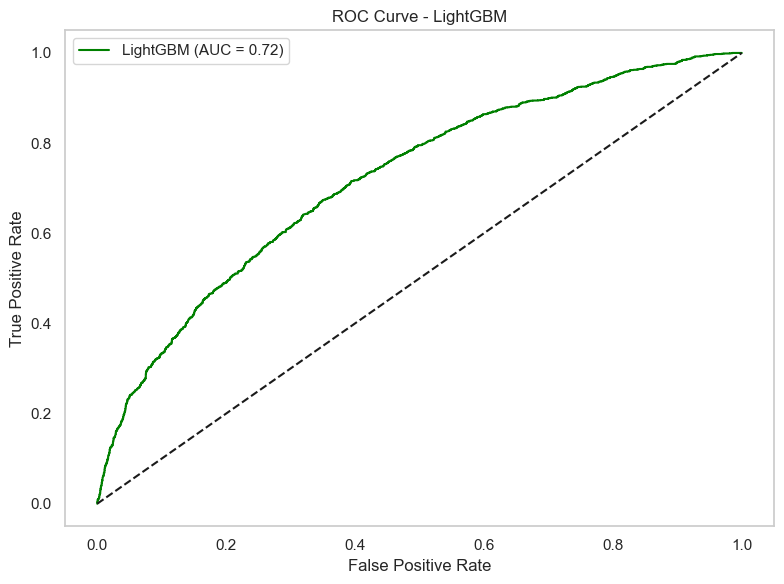

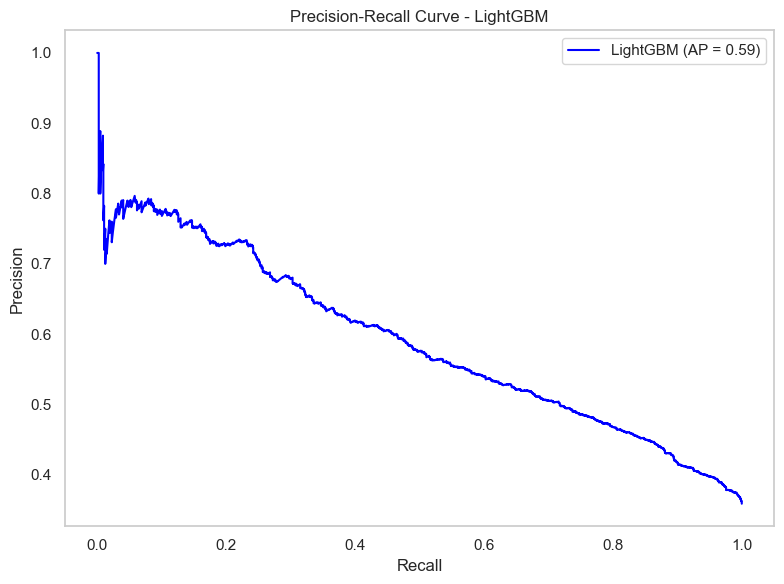

In [94]:
from sklearn.metrics import roc_curve, roc_auc_score, precision_recall_curve, average_precision_score
import matplotlib.pyplot as plt

# Get predicted probabilities
y_proba_lgbm = lgbm_model.predict_proba(X_test)[:, 1]

# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_proba_lgbm)
auc_score = roc_auc_score(y_test, y_proba_lgbm)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"LightGBM (AUC = {auc_score:.2f})", color='green')
plt.plot([0, 1], [0, 1], "k--")
plt.title("ROC Curve - LightGBM")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.grid()
plt.tight_layout()
plt.savefig("lightgbm_roc_curve.png")
plt.show()

# Precision-Recall Curve
precision, recall, _ = precision_recall_curve(y_test, y_proba_lgbm)
avg_precision = average_precision_score(y_test, y_proba_lgbm)

plt.figure(figsize=(8, 6))
plt.plot(recall, precision, label=f"LightGBM (AP = {avg_precision:.2f})", color='blue')
plt.title("Precision-Recall Curve - LightGBM")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()


### Check for catboost Algorith Also

✅ CatBoost Accuracy: 0.6971051511281396
✅ Classification Report:
               precision    recall  f1-score   support

           0       0.72      0.86      0.78      3012
           1       0.62      0.41      0.49      1686

    accuracy                           0.70      4698
   macro avg       0.67      0.63      0.64      4698
weighted avg       0.68      0.70      0.68      4698



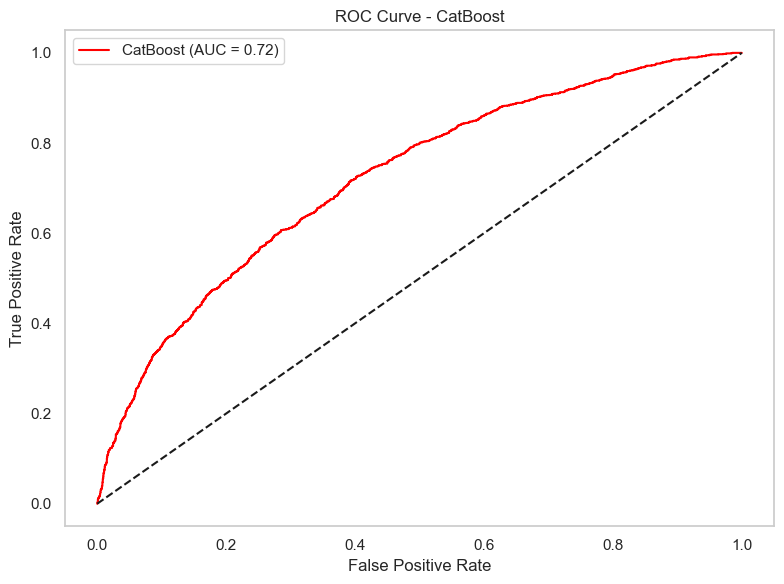

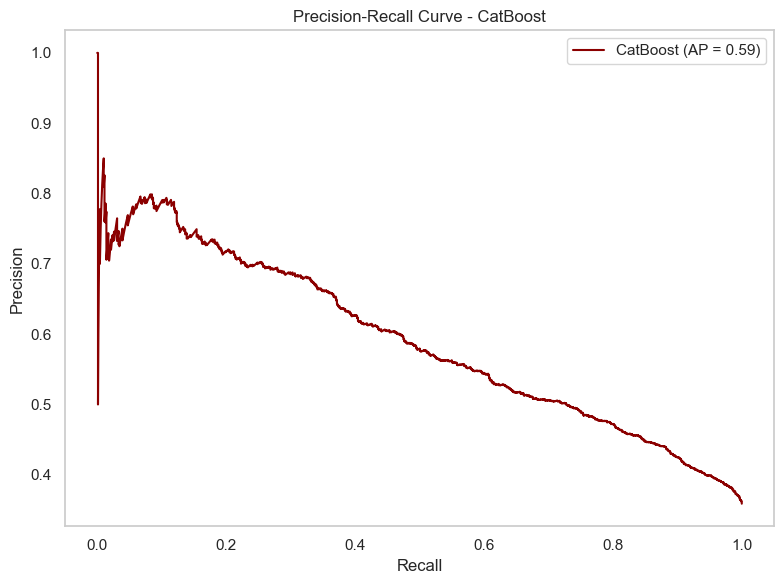

In [96]:
from catboost import CatBoostClassifier
from sklearn.metrics import (
    accuracy_score, classification_report,
    roc_curve, roc_auc_score,
    precision_recall_curve, average_precision_score
)
import matplotlib.pyplot as plt

# Make sure y is 1D
import numpy as np
y_train = np.ravel(y_train)
y_test = np.ravel(y_test)

# 1. Train CatBoost
cat_model = CatBoostClassifier(verbose=0, random_state=42)
cat_model.fit(X_train, y_train)

# 2. Predictions
y_pred_cat = cat_model.predict(X_test)
y_proba_cat = cat_model.predict_proba(X_test)[:, 1]

# 3. Evaluation
print("✅ CatBoost Accuracy:", accuracy_score(y_test, y_pred_cat))
print("✅ Classification Report:\n", classification_report(y_test, y_pred_cat))

# 4. ROC Curve
fpr_cat, tpr_cat, _ = roc_curve(y_test, y_proba_cat)
auc_cat = roc_auc_score(y_test, y_proba_cat)

plt.figure(figsize=(8, 6))
plt.plot(fpr_cat, tpr_cat, label=f"CatBoost (AUC = {auc_cat:.2f})", color='red')
plt.plot([0, 1], [0, 1], "k--")
plt.title("ROC Curve - CatBoost")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.grid()
plt.tight_layout()
plt.savefig("catboost_roc_curve.png")
plt.show()

# 5. Precision-Recall Curve
precision_cat, recall_cat, _ = precision_recall_curve(y_test, y_proba_cat)
avg_precision_cat = average_precision_score(y_test, y_proba_cat)

plt.figure(figsize=(8, 6))
plt.plot(recall_cat, precision_cat, label=f"CatBoost (AP = {avg_precision_cat:.2f})", color='darkred')
plt.title("Precision-Recall Curve - CatBoost")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()


### Summary